<a href="https://colab.research.google.com/github/AbhyanandSharma2005/ML-model-practice-on-real-data/blob/main/K-modeClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

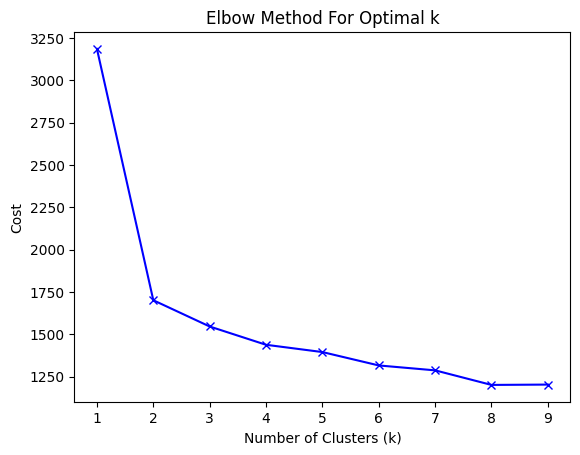

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 1701.0
Run 1, iteration: 2/100, moves: 3, cost: 1701.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 34, cost: 1701.0
Run 2, iteration: 2/100, moves: 3, cost: 1701.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 20, cost: 1701.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 49, cost: 1701.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15, cost: 1706.0
Best run was number 1

Cluster Modes (Centroids):
[['y' 'n' 'y' 'n' 'n' 'n' 'y' 'y' 'y' 'y' 'n' 'n' 'n' 'n' 'y' 'y']
 ['n' 'y' 'n' 'y' 'y' 'y' 'n' 'n' 'n' 'n' 'n' 'y' 'y' 'y' 'n' 'y']]

--- Party Distribution in Cluster 0 ---
0
democrat      223
republican   

In [1]:
!pip install kmodes

import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(data_url, header=None)

X = df.iloc[:, 1:]

cost = []
K = range(1, 10)

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

k = 2

kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=1)

clusters = kmode.fit_predict(X)

print("\nCluster Modes (Centroids):")
print(kmode.cluster_centroids_)

df['cluster'] = clusters

cluster_0_parties = df[df['cluster'] == 0][0].value_counts()
cluster_1_parties = df[df['cluster'] == 1][0].value_counts()

print("\n--- Party Distribution in Cluster 0 ---")
print(cluster_0_parties)

print("\n--- Party Distribution in Cluster 1 ---")
print(cluster_1_parties)